## Xarray demo

In a nutshell, [`xarray`](http://xarray.pydata.org/en/stable/) is n-dimensional `pandas`.

This means that instead of (or really, as well as) using positional integer indices, we can attach more meaningful indices to our data's dimensions. 

`xarray` calls these indices "coordinates".

### 1D data

In [1]:
import xarray as xr

Let's make some data (e.g. a gamma-ray log) and some depths.

In [2]:
data = [23, 34, 5, 45, 34, 56, 67, 45, 67] # GR values

In [3]:
depths = [100,101,102,103,104,105,106,107,108] #  metres

Without `xarray`, it's a hassle to look up the data at a particular depth:

In [4]:
data[depths.index(103)]

45

Instead, let's make an `xarray`:

In [5]:
x = xr.DataArray(data,
                 name='GR',
                 coords=[depths],
                 dims=['Depth'],
                )

In [6]:
x

<xarray.DataArray 'GR' (Depth: 9)>
array([23, 34,  5, 45, 34, 56, 67, 45, 67])
Coordinates:
  * Depth    (Depth) int64 100 101 102 103 104 105 106 107 108

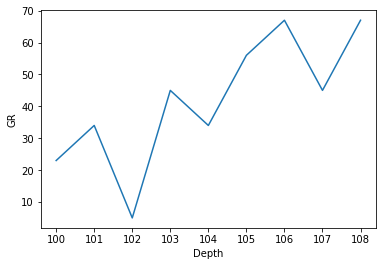

In [7]:
%matplotlib inline
x.plot()

Notice how it labels everything for us!

This thing behaves more or less like a numpy array:

In [8]:
x > 50

<xarray.DataArray 'GR' (Depth: 9)>
array([False, False, False, False, False,  True,  True, False,  True])
Coordinates:
  * Depth    (Depth) int64 100 101 102 103 104 105 106 107 108

In [9]:
x[3] * 123

<xarray.DataArray 'GR' ()>
array(5535)
Coordinates:
    Depth    int64 103

What's really nice is that we can slice between indices without a key error:

In [10]:
x.loc[104.5:107.67]

<xarray.DataArray 'GR' (Depth: 3)>
array([56, 67, 45])
Coordinates:
  * Depth    (Depth) int64 105 106 107

We can also interpolate values:

In [11]:
x.interp(Depth=104.35)

<xarray.DataArray 'GR' ()>
array(41.7)
Coordinates:
    Depth    float64 104.3

And we can pass an array-like to this:

In [12]:
x.interp(Depth=[104.2, 104.3, 104.4, 104.5, 104.6, 104.7])

<xarray.DataArray 'GR' (Depth: 6)>
array([38.4, 40.6, 42.8, 45. , 47.2, 49.4])
Coordinates:
  * Depth    (Depth) float64 104.2 104.3 104.4 104.5 104.6 104.7

### 2D data

Let's use made-up data again:

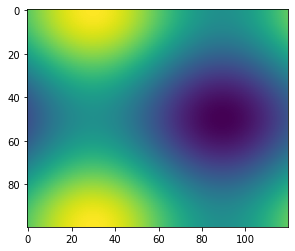

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y):
    return np.sin(x) + np.cos(y)

x_ = np.linspace(0, 2 * np.pi, 120)
y_ = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

z = f(x_, y_)
plt.imshow(z)

In [14]:
z.shape

(100, 120)

In [15]:
np.set_printoptions(precision=2)

In [16]:
z[50:55, 50:55]

array([[-0.52, -0.57, -0.61, -0.66, -0.71],
       [-0.51, -0.56, -0.61, -0.66, -0.71],
       [-0.51, -0.55, -0.6 , -0.65, -0.7 ],
       [-0.49, -0.54, -0.59, -0.64, -0.69],
       [-0.48, -0.53, -0.57, -0.62, -0.67]])

Now let's make some coordinates:

In [17]:
x = np.arange(100) + 1000
y = np.arange(120) + 1000

In [18]:
x

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099])

Now we can make the `xarray`:

In [19]:
zx = xr.DataArray(z,
                  name='Elevation [m]',
                  coords=[x,y],
                  dims=['UTMx', 'UTMy'],
                 )

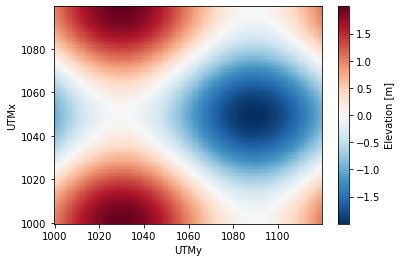

In [20]:
zx.plot()

## 3D array

There are a couple of ways to go to higher dimensions:

- We could store new attributes of the 2D dataset.
- We could load a 3D volume of data with new coordinates.

First, let's add another dimension to the horizon - could be another attribute.

In [21]:
zsq = np.sqrt(np.abs(z))

Make a 3D array with this new attribute in the first dimension:

In [22]:
z2 = np.stack([z, zsq])

In [23]:
attribs = ['Elev', 'SqrtElev']
z = xr.DataArray(z2,
                 name='Elevation [m]',
                 coords=[attribs,x,y],
                 dims=['Attribute','UTMx', 'UTMy'],
                )

In [24]:
z

<xarray.DataArray 'Elevation [m]' (Attribute: 2, UTMx: 100, UTMy: 120)>
array([[[1.  , 1.05, 1.11, ..., 0.89, 0.95, 1.  ],
        [1.  , 1.05, 1.1 , ..., 0.89, 0.95, 1.  ],
        [0.99, 1.04, 1.1 , ..., 0.89, 0.94, 0.99],
        ...,
        [0.99, 1.04, 1.1 , ..., 0.89, 0.94, 0.99],
        [1.  , 1.05, 1.1 , ..., 0.89, 0.95, 1.  ],
        [1.  , 1.05, 1.11, ..., 0.89, 0.95, 1.  ]],

       [[1.  , 1.03, 1.05, ..., 0.95, 0.97, 1.  ],
        [1.  , 1.03, 1.05, ..., 0.94, 0.97, 1.  ],
        [1.  , 1.02, 1.05, ..., 0.94, 0.97, 1.  ],
        ...,
        [1.  , 1.02, 1.05, ..., 0.94, 0.97, 1.  ],
        [1.  , 1.03, 1.05, ..., 0.94, 0.97, 1.  ],
        [1.  , 1.03, 1.05, ..., 0.95, 0.97, 1.  ]]])
Coordinates:
  * Attribute  (Attribute) <U8 'Elev' 'SqrtElev'
  * UTMx       (UTMx) int64 1000 1001 1002 1003 1004 ... 1096 1097 1098 1099
  * UTMy       (UTMy) int64 1000 1001 1002 1003 1004 ... 1116 1117 1118 1119

Plot one of the attributes...

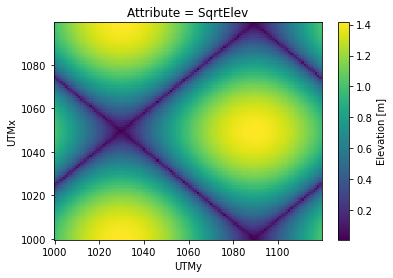

In [25]:
z[1].plot()

## `xarray` with seismic

In [26]:
import segyio

with segyio.open('../../data/Penobscot_0-1000ms.sgy') as s:
    c = segyio.cube(s)

ModuleNotFoundError: No module named 'segyio'

In [ ]:
c.shape

In [ ]:
il, xl, ts = c.shape

inlines = np.arange(il) + 1000
xlines = np.arange(xl) + 1000
tslices = 4 * np.arange(ts) / 1000

z = xr.DataArray(c,
                 name='Amplitude',
                 coords=[inlines, xlines, tslices],
                 dims=['Inline','Xline', 'Time'],
                )

This still works like a NumPy array:

In [ ]:
plt.imshow(z[:, :, 100], origin='lower', aspect=0.5)

But now we can do nice things like:

In [ ]:
z.loc[:, :, 0.5].plot()

In [ ]:
z.loc[1200].T.plot()
plt.gca().invert_yaxis()

For free, we got:

- Correct labeling of the axes and their ticks
- A correct title
- A divergent colourmap
- A labeled colourbar

## n-dimensional interpolation with `xarray`

Check out the end of [the SEG tutorial update notebook](https://github.com/seg/tutorials-2016/blob/master/1604_Function_of_interpolation/The_function_of_interpolation_with_xarray.ipynb) for a demo of using a horizon to interpolate into a 3D seismic volume. 

----

(c) Agile Scientific 2019